# Car Make and Model Recognizer
I shall explore here my tries to reach a good optimizer

## Importing Libraries

In [1]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout, Flatten, Dense, BatchNormalization, Activation, PReLU, LeakyReLU
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from glob import glob
from keras import regularizers
from keras.layers.advanced_activations import PReLU
from keras import models
from keras.applications import ResNet50
from keras.optimizers import RMSprop

Using TensorFlow backend.


## Pre-Processing

### Data Augmentation
First ImageDataGenerator is used to set the parameters of Augmenting and specifying the validation split flow_from_directory creates image generators with target sizes and batches sizes specified, categorical class mode means we are dealing with a classifying problem, showing the subset if training or validation is important so the split is done.

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.25,
                                   rotation_range = 20,
                                   horizontal_flip=True,
                                  validation_split = 0.3)


train_data = train_datagen.flow_from_directory('My_Cars/trainCropped',
                                              target_size=(256, 256),
                                              batch_size=32,
                                              class_mode='categorical',
                                              subset='training')
test_data = train_datagen.flow_from_directory('My_Cars/trainCropped',
                                              target_size=(256, 256),
                                              batch_size=32,
                                              class_mode='categorical',
                                            subset='validation')

Found 5796 images belonging to 196 classes.
Found 2348 images belonging to 196 classes.


## Model
Building with ResNet50

In [3]:
model = Sequential()

## import ResNet50 weights pretrained on imagenet without the top layer so that we train the classifier on our dataset
conv_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
model.add(conv_base)
## output layer
model.add(GlobalAveragePooling2D())

model.add(Dense(196, activation='softmax'))

## Freeze the rest of ResNet50 layers to avoid retraining the whole model
for layer in conv_base.layers:
  layer.trainable = False

## compile the model with lr 0.0001
model.compile(optimizer=RMSprop(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.


C:\Users\CostaPC2\Anaconda3\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [4]:
## Show model Architecture
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 8, 8, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 196)               401604    
Total params: 23,989,316
Trainable params: 401,604
Non-trainable params: 23,587,712
_________________________________________________________________


### Train

In [5]:
from keras.callbacks import ModelCheckpoint  

### Number of epochs to train.

epochs = 100

### Checkpointer to save best the best weights.

checkpointer = ModelCheckpoint(filepath='Saved_Models/weights.best.from_scratch45.hdf5', 
                               verbose=1, save_best_only=True)
## Training the Model
## pass training samples generator
## steps per epochs = number of training samples / batch size
## number of epochs
## pass validation samples generator
## validation steps = number of validation samples / batch size
## pass checkpointer
Saving = model.fit_generator(train_data,
          steps_per_epoch=182,  
          epochs=epochs,
          verbose=1, 
          validation_data=test_data,
          validation_steps=74,
          callbacks=[checkpointer])


Instructions for updating:
Use tf.cast instead.
Epoch 1/100
182/182 [==============================] - 143s 786ms/step - loss: 5.3354 - acc: 0.0101 - val_loss: 5.0845 - val_acc: 0.0217

Epoch 00001: val_loss improved from inf to 5.08446, saving model to Saved_Models/weights.best.from_scratch45.hdf5
Epoch 2/100
182/182 [==============================] - 132s 724ms/step - loss: 4.8751 - acc: 0.0474 - val_loss: 4.7391 - val_acc: 0.0605

Epoch 00002: val_loss improved from 5.08446 to 4.73913, saving model to Saved_Models/weights.best.from_scratch45.hdf5
Epoch 3/100
182/182 [==============================] - 130s 715ms/step - loss: 4.5068 - acc: 0.1123 - val_loss: 4.4756 - val_acc: 0.0958

Epoch 00003: val_loss improved from 4.73913 to 4.47562, saving model to Saved_Models/weights.best.from_scratch45.hdf5
Epoch 4/100
182/182 [==============================] - 130s 713ms/step - loss: 4.1989 - acc: 0.1669 - val_loss: 4.2486 - val_acc: 0.1491

Epoch 00004: val_loss improved from 4.47562 to 4.2

182/182 [==============================] - 130s 712ms/step - loss: 0.7041 - acc: 0.8517 - val_loss: 2.1105 - val_acc: 0.5017

Epoch 00069: val_loss did not improve from 2.08527
Epoch 70/100
182/182 [==============================] - 130s 713ms/step - loss: 0.6906 - acc: 0.8535 - val_loss: 2.1095 - val_acc: 0.5013

Epoch 00070: val_loss did not improve from 2.08527
Epoch 71/100
182/182 [==============================] - 130s 714ms/step - loss: 0.6865 - acc: 0.8518 - val_loss: 2.1074 - val_acc: 0.5089

Epoch 00071: val_loss did not improve from 2.08527
Epoch 72/100
182/182 [==============================] - 129s 711ms/step - loss: 0.6682 - acc: 0.8539 - val_loss: 2.1157 - val_acc: 0.5009

Epoch 00072: val_loss did not improve from 2.08527
Epoch 73/100
182/182 [==============================] - 129s 711ms/step - loss: 0.6631 - acc: 0.8609 - val_loss: 2.1292 - val_acc: 0.4996

Epoch 00073: val_loss did not improve from 2.08527
Epoch 74/100
182/182 [==============================] - 130s 71

## Showing Results
Show top 31 entries

In [6]:

vals = pd.DataFrame.from_dict(Saving.history)
vals = pd.concat([pd.Series(range(0,100),name='epochs'),vals],axis=1)
vals.head(n=31)

,epochs,val_loss,val_acc,loss,acc
0,0,5.084463,0.021721,5.337760,0.010179
1,1,4.739132,0.060477,4.875071,0.047619
2,2,4.475622,0.095826,4.507603,0.111629
3,3,4.248584,0.149063,4.198943,0.166494
4,4,4.075848,0.168654,3.938109,0.224983
5,5,3.916186,0.193356,3.701780,0.272774
6,6,3.786184,0.220613,3.492090,0.323499
7,7,3.638843,0.251278,3.321304,0.348344
8,8,3.544241,0.266610,3.153880,0.395963
9,9,3.437432,0.286201,2.985754,0.424431


In [1]:
Showing graphs of the results

SyntaxError: invalid syntax (<ipython-input-1-b49b3be2ab94>, line 1)

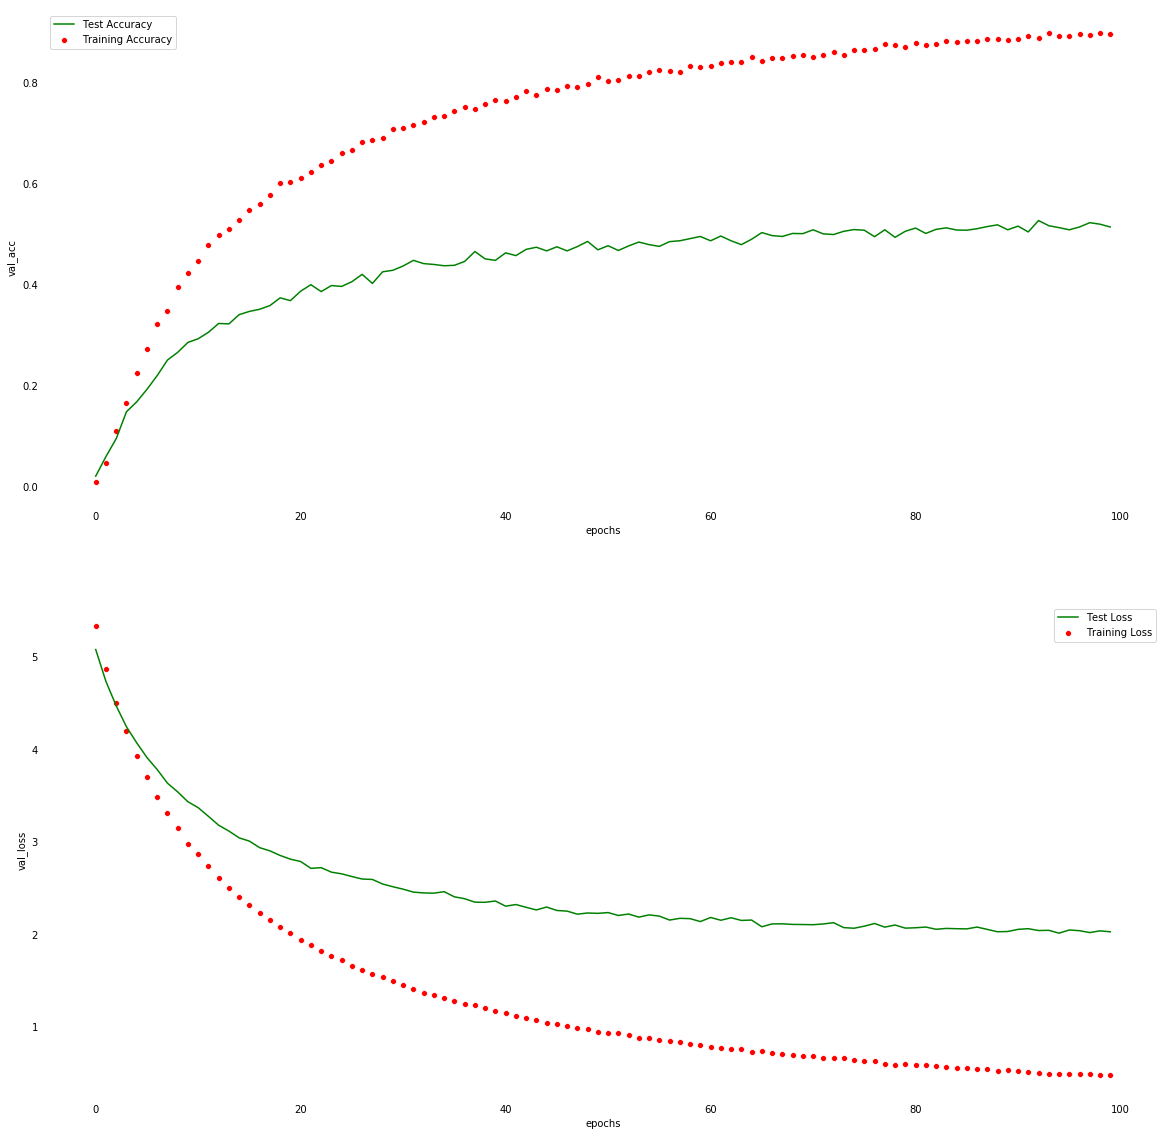

In [7]:
import seaborn as sns
sns.set_style({'xtick.bottom':False,
               'ytick.left':False,
               'axes.spines.bottom': False,
               'axes.spines.left': False,
               'axes.spines.right': False,
               'axes.spines.top': False})

ig,(ax,ax1) = plt.subplots(nrows=2,ncols=1,figsize=(20,20))
sns.scatterplot(x='epochs',y='acc',data=vals,ax=ax,color='r')
sns.lineplot(x='epochs',y='val_acc',data=vals,ax=ax,color='g')
sns.scatterplot(x='epochs',y='loss',data=vals,ax=ax1,color='r')
sns.lineplot(x='epochs',y='val_loss',data=vals,ax=ax1,color='g')
ax.legend(labels=['Test Accuracy','Training Accuracy'])
ax1.legend(labels=['Test Loss','Training Loss'])

In [ ]:
# for i in range(n_iterations):
#         print('\r{}/{}'. format(i, n_iterations))
#         #initilaize random hyperparameters
#         random_parameters = {K: random.sample(V, 1)[0] for K, V in parameters_grid.items()}
#         #create model with random hyperparameters
#         model = create_model(random_parameters)
#         opt = create_RMSprop_optimizer(random_parameters)
#         #compile model
#         model.compile(optimizer = opt, loss='categorical_crossentropy', metrics=['accuracy'])
#         #train model
#         epochs = 40
#         checkpointer = ModelCheckpoint(filepath='saved_models/model_weights.hdf5', verbose=1, save_best_only=True)
#         early_stopping = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 8)
#         history = model.fit(X_train, Y_train,
#                   callbacks = [checkpointer, early_stopping],
#                   validation_split = 0.33,
#                   epochs=epochs, batch_size = 20, verbose=1)
#         #compare current min validation loss with global min validation loss
#         current_min_val_loss = np.min(history.history['val_loss'])
#         if(current_min_val_loss < global_min_val_loss):
#             global_min_val_loss = current_min_val_loss
#             #save the best model so far
#             model.load_weights('saved_models/model_weights.hdf5')
#             model.save('saved_models/best_model.h5')
#             print('saving new best model, val_loss = {}'.format(current_min_val_loss))
#             #save best hyperparameters
#             best_hyperparameters = random_parameters